# Hands-on exercise

In this simple example you are required to perform a simple linear regression with scipy. Find all the information on the function in the documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

### Assignment

1) Load the provided .csv file with the used car data

2) Use a linear regression to estimate the car prices from the year, kilometers or engine power. You can make a simple 1D regression from each one of the parameters independently (as an optional task you can also try a 2D or 3D regression combining multiple cues)

3) Firstly perform the estimation using the scipy linregress function (or alternatively you can use the sklearn.linear_model.LinearRegression class).
NB: check the documentation of the two methods!! In particular be aware of the number of outputs (in case use "_" to avoid the return of a specific output).

4) Have a look at the correlation coefficient to see which of the 3 features works better

5) Then implement the least square algorithm: you should get exactly the same solution of linregress !

6) Plot the data and the lines representing the output of the linregress and least square algorithms


In [1]:
import matplotlib.pyplot as plt
import csv
from scipy import stats
import numpy as np
import sklearn as sl
from sklearn import linear_model

In [3]:
# Load the provided data file with the used car data (you can also have a look at it with any text editor)

filename = "data_lab0/km_year_power_price.csv"
lines = csv.reader(open(filename, newline=''), delimiter=',')

dataset = list(lines)
del dataset[0]

for i in range(len(dataset)):
    dataset[i] = [float(x) for x in dataset[i]]
    
dataset = np.array(dataset)

print('Dataset:\n', '[Km', ' '*9, 'Year', ' '*9, 'Power', ' '*9, 'Price]\n', dataset)

data_km = dataset[:, 0:4:3]
data_year = dataset[:, 1:4:2]
data_power = dataset[:, 2:4]

datadic = {'km': data_km, 'year': data_year, 'power': data_power}


Dataset:
 [Km           Year           Power           Price]
 [[1.250000e+05 2.001000e+03 4.000000e+01 1.371110e+03]
 [1.500000e+05 2.001000e+03 4.000000e+01 1.298700e+03]
 [5.000000e+03 2.001000e+03 6.000000e+01 1.232430e+03]
 ...
 [2.000000e+04 2.015000e+03 2.600000e+02 4.949238e+04]
 [1.000000e+04 2.015000e+03 3.000000e+02 3.854269e+04]
 [2.000000e+04 2.015000e+03 3.000000e+02 3.968332e+04]]


Use linear regression to estimate the car prices from the year, kilometers or engine power. 
You can make a simple 1D regression from each one of the parameters independently 




In [4]:
# linear regression with linregress

r_km = stats.linregress(x=data_km, y=None)
r_year = stats.linregress(x=data_year, y=None)
r_power = stats.linregress(x=data_power, y=None)

print('Results km-price: ', r_km)
print('Results year-price: ', r_year)
print('Results power-price: ', r_power)

Results km-price:  LinregressResult(slope=-0.054251513309725635, intercept=16692.345302519738, rvalue=-0.25728674299884974, pvalue=4.6897144107235236e-21, stderr=0.0056622275650525895, intercept_stderr=512.1908433023634)
Results year-price:  LinregressResult(slope=1509.0938253352238, intercept=-3018309.4849569635, rvalue=0.6767043169095446, pvalue=2.07223115991105e-174, stderr=45.625811824073196, intercept_stderr=91628.09494333212)
Results power-price:  LinregressResult(slope=90.33080718820231, intercept=-1303.912698987995, rvalue=0.7085500315263968, pvalue=2.670876398432412e-198, stderr=2.4999213289302586, intercept_stderr=413.9119040279444)


In [5]:
# (Optional) linear regression with linear_model.LinearRegression() (estimate price from year)
# Recall that in Python a mx1 matrix is different from a 1D array -> need to reshape

# Split the data into training/testing sets
data_year_x_train = data_year[:, 0][:-20]
data_year_x_test = data_year[:, 0][-20:]

# # Split the targets into training/testing sets
data_year_y_train = data_year[:, 1][:-20]
data_year_y_test = data_year[:, 1][-20:]

# ...


In [ ]:
# (Optional) perform linear regression with a manually implemented least squares (estimate price from year)
# You should get exactly the same solution of linregress !
# You can do it later after the lectures on linear models

# your code.....

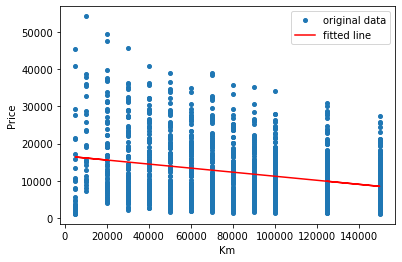

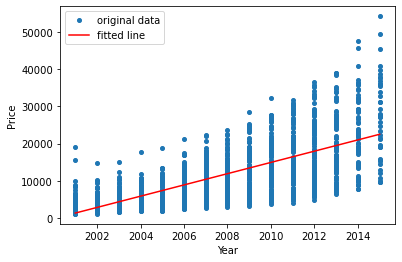

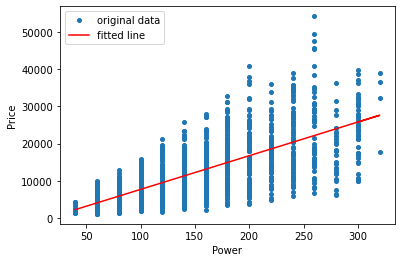

In [6]:
# Plot the data and the lines representing the output of the linregress and least square algorithms

import matplotlib.pyplot as plt

def plotfunc(x, y, result, feature): 
    plt.plot (x, y, 'o', label= 'original data', markersize = 4)
    plt.plot (x, result.intercept + result.slope*x, 'r', label = 'fitted line')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.legend()
    plt.show()
        
plotfunc(data_km[:, 0], data_km[:, 1], r_km, 'Km')
plotfunc(data_year[:, 0], data_year[:, 1], r_year, 'Year')
plotfunc(data_power[:, 0], data_power[:, 1], r_power, 'Power')

In [7]:
# Have a look at the correlation coefficients to see which of the 3 features works better

correlations = np.array([r_km.rvalue, r_year.rvalue, r_power.rvalue])
best_corr_index = np.argmax(correlations)

if best_corr_index == 0:
    print('Best correlation: km, rvalue = ', correlations[0])
elif best_corr_index == 1:
    print('Best correlation: year, rvalue = ', correlations[1])
elif best_corr_index == 2:
    print('Best correlation: power, rvalue = ', correlations[2])
    

Best correlation: power, rvalue =  0.7085500315263968


In [ ]:
# (Optional) 2D linear regression with linear model (estimate price from year and power)


# your code......
